In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from data_processing import load_and_preprocess_data

In [6]:
datafile = Path("data") / "LD2011_2014.txt"
df_train, df_test, unnormalize_fn = load_and_preprocess_data(datafile)
print(df_train.shape)
print(df_train.head())
print(df_train.tail())

(112204, 370)
     MT_001    MT_002    MT_003    MT_004    MT_005    MT_006    MT_007  \
0 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034   
1 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034   
2 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034   
3 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034   
4 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034 -0.350034   

     MT_008    MT_009    MT_010  ...    MT_361    MT_362    MT_363    MT_364  \
0 -0.350034 -0.350034 -0.350034  ... -0.350034 -0.350034 -0.350034 -0.350034   
1 -0.350034 -0.350034 -0.350034  ... -0.350034 -0.350034 -0.350034 -0.350034   
2 -0.350034 -0.350034 -0.350034  ... -0.350034 -0.350034 -0.350034 -0.350034   
3 -0.350034 -0.350034 -0.350034  ... -0.350034 -0.350034 -0.350034 -0.350034   
4 -0.350034 -0.350034 -0.350034  ... -0.350034 -0.350034 -0.350034 -0.350034   

     MT_365    MT_366    MT_367    MT_368    MT_369   

In [3]:
def visualize_energy_consumption(
    train_df,
    test_df,
    client_indices,
    smoothing_window,
    label_fn=None,
    standardized=False,
):
    # Visualize the smoothed energy consumption of selected clients from the training set
    train_dates = pd.date_range(start="2011-01-01", periods=len(train_df), freq="15min")
    test_dates = pd.date_range(
        start=train_dates[-1] + pd.Timedelta(minutes=15),
        periods=len(test_df),
        freq="15min",
    )
    plt.figure(figsize=(12, 8))
    for i in client_indices:
        if isinstance(train_df, pd.DataFrame):
            smoothed_data_train = (
                train_df.iloc[:, i].rolling(window=smoothing_window).mean()
            )
            smoothed_data_test = (
                test_df.iloc[:, i].rolling(window=smoothing_window).mean()
            )
        else:
            smoothed_data_train = train_df.rolling(window=smoothing_window).mean()
            smoothed_data_test = test_df.rolling(window=smoothing_window).mean()
        label = label_fn(i) if label_fn else f"Client {i+1}"
        color = plt.cm.tab10(i % 10)  # Get a unique color for this client
        plt.plot(
            train_dates, smoothed_data_train, color=color, linestyle="-", label=label
        )
        plt.plot(test_dates, smoothed_data_test, color=color, linestyle="--")

    # Add vertical line at train/test split
    plt.axvline(
        x=train_dates[-1], color="black", linestyle="--", label="Train/Test Split"
    )

    plt.legend()
    smoothing_hours = smoothing_window / 4
    title = f"Energy Consumption of {len(client_indices)} Clients\n(Smoothed over {smoothing_hours} hours)"
    if standardized:
        title = f"Standardized {title}"
    plt.title(title)
    plt.xlabel("Time")
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter("%Y"))
    ylabel = (
        "Energy Consumption (kWh)"
        if not standardized
        else "Standardized Energy Consumption"
    )
    plt.ylabel(ylabel)

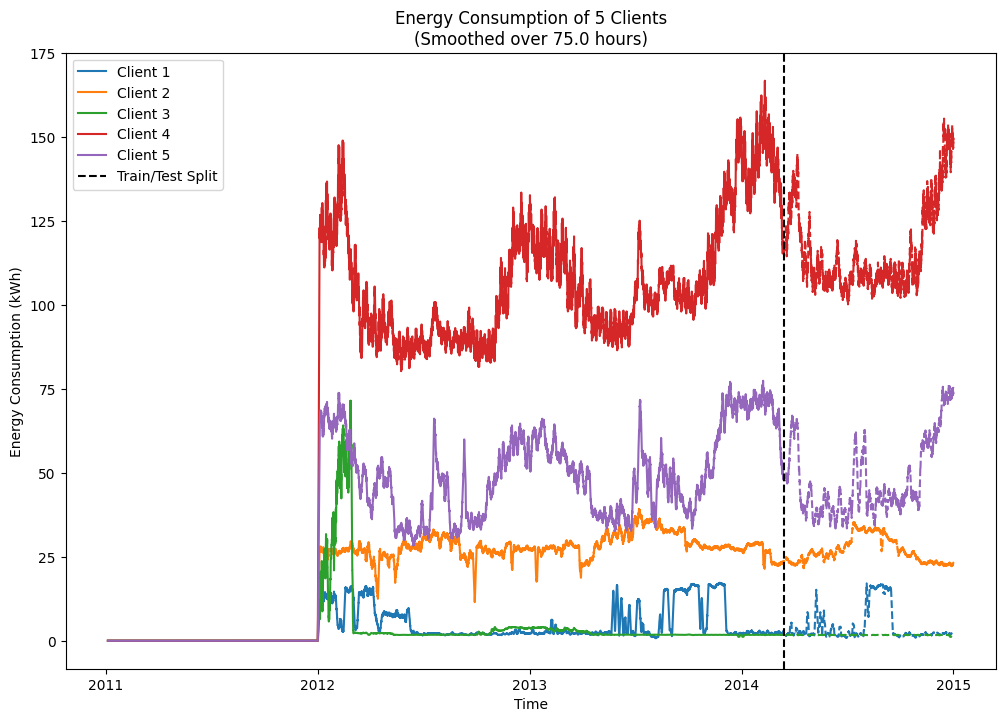

In [10]:
visualize_energy_consumption(
    pd.DataFrame(unnormalize_fn(df_train)), pd.DataFrame(unnormalize_fn(df_test)), [x for x in range(5)], 300
);

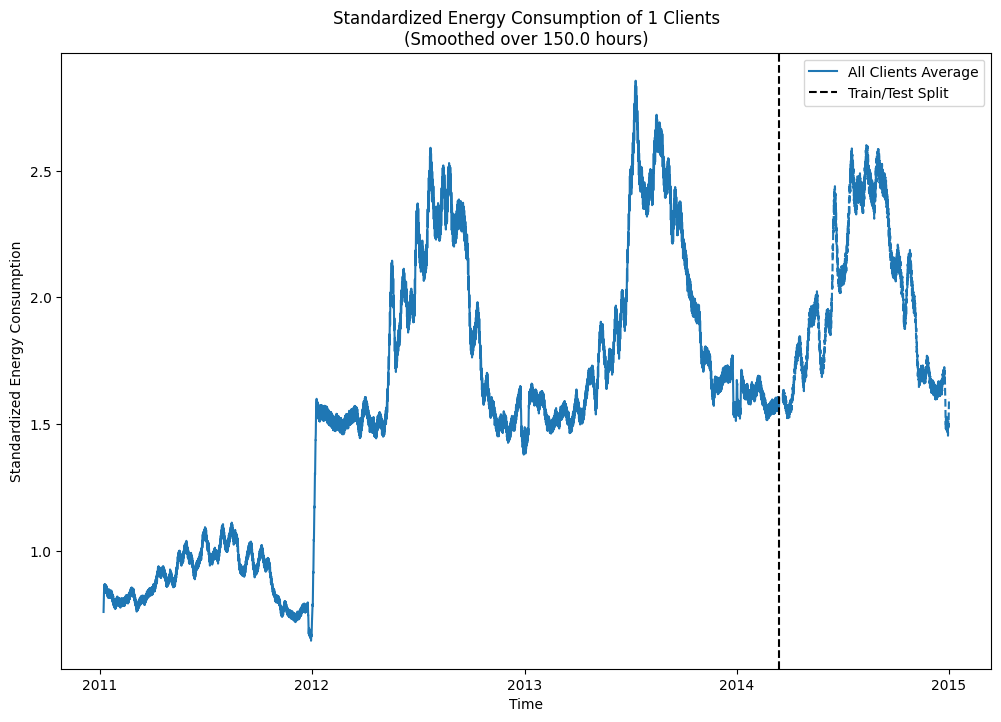

In [11]:
# Get average standardized consumption over time
fig = visualize_energy_consumption(
    df_train.mean(axis=1),
    df_test.mean(axis=1),
    [0],
    600,
    label_fn=lambda x: f"All Clients Average",
    standardized=True,
)

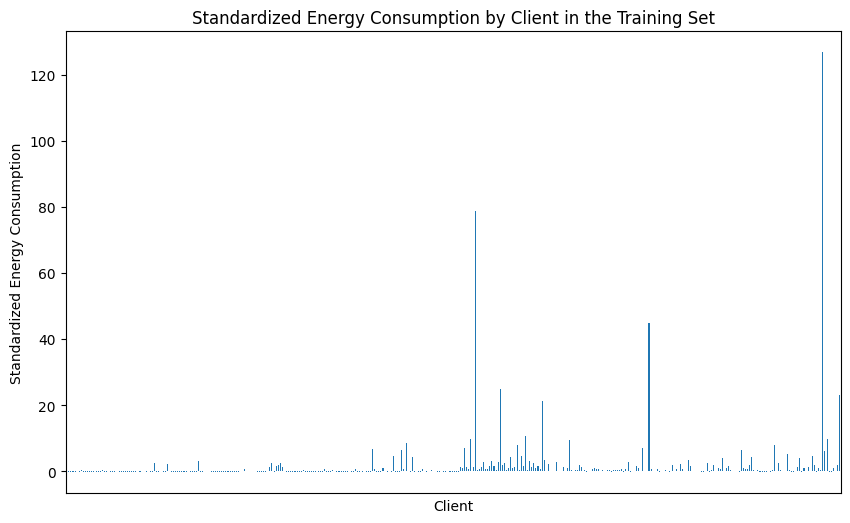

Text(0.5, 0, 'Client')

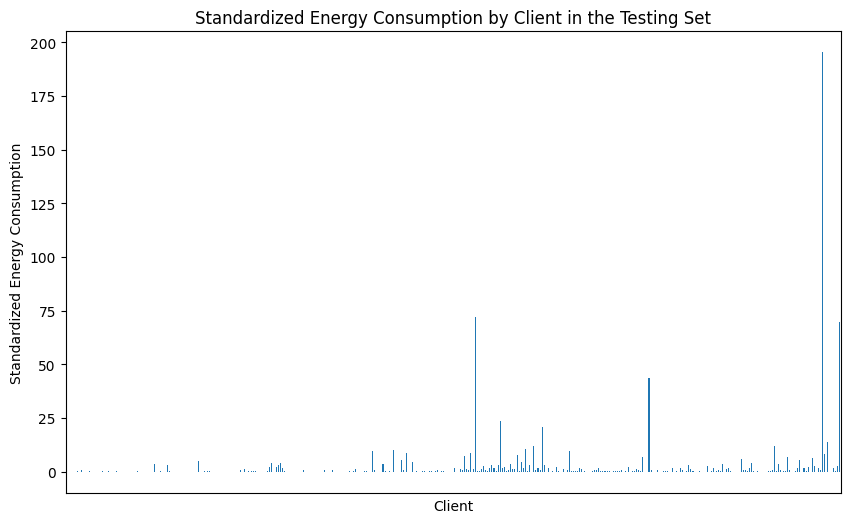

In [12]:
# Show standardised energy consumption by client for the training set
df_train.mean().plot(kind="bar", figsize=(10, 6))
plt.xticks([])
plt.title("Standardized Energy Consumption by Client in the Training Set")
plt.ylabel("Standardized Energy Consumption")
plt.xlabel("Client")
plt.show()

# Show standardised energy consumption by client for the testing set
df_test.mean().plot(kind="bar", figsize=(10, 6))
plt.xticks([])
plt.title("Standardized Energy Consumption by Client in the Testing Set")
plt.ylabel("Standardized Energy Consumption")
plt.xlabel("Client")